# Initial Exploration

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


df = pd.read_csv('data/kc_house_data.csv')
cont = pd.read_csv('data/continuous_df.csv')
cat = pd.read_csv('data/categorical_df.csv')
df_clean = pd.read_csv('data/df_untransformed.csv')

In [2]:
#Use if want to only look at wealthy vs not neighborhoods
#df.groupby('zipcode')['price'].sum().sort_values(ascending = False)

#Want to look at grade in each zipcode
#df.groupby(['grade', 'zipcode'])['id'].count().sort_values(ascending = False)

df_basement = df_clean[df_clean['sqft_basement'] != 0]
df_clean['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [40]:
df_num = df.drop(['date', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'zipcode', 'lat', 'long'], axis = 1)

<AxesSubplot:>

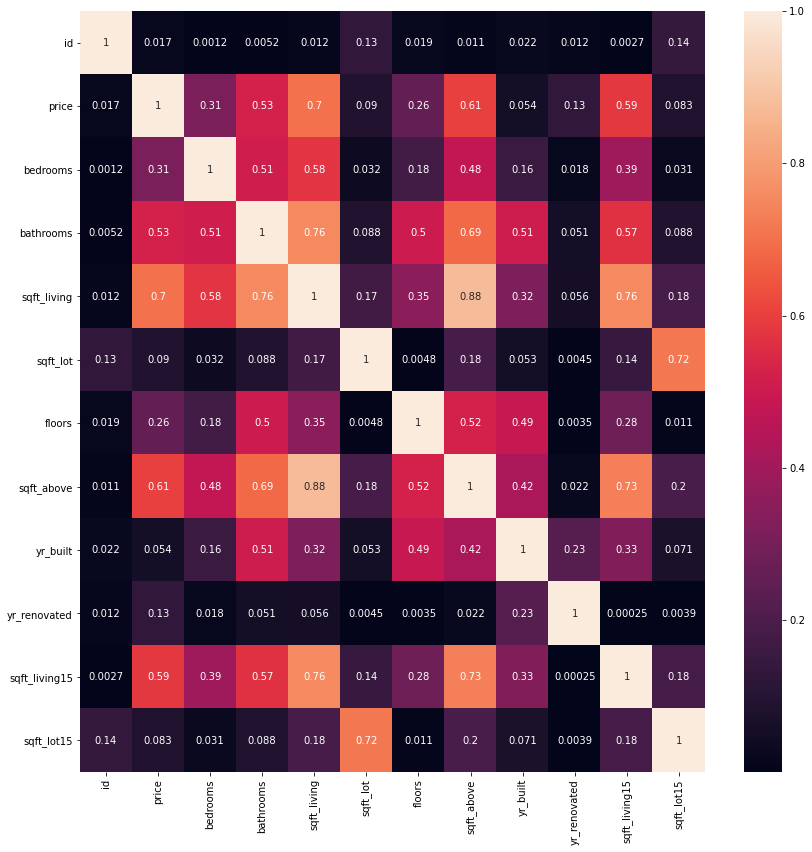

In [41]:
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(df_num.corr().abs(), annot = True)

## Test Function

### sklearn version

In [60]:
#Should I add in cross-evaluation for MSE??
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
from sklearn.metrics import mean_squared_error
from scipy import stats

def model_maker(X, y):
    #Gets figures ready for plotting
    fig, axes = plt.subplots(nrows = 2, figsize = (12,12))
    
    #Splits data in testing and training for evaluation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
    
    #ADD BACK IN IF NEED, SHOULD DO BEFORE CALLING
#     Tests for Linearity/Multicollinearity
#     print('Testing for Linearity and Multicollinearity')
#     combine = pd.concat([X_train, y_train], axis = 1)
#     sns.pairplot(combine)
#     plt.show()
    
    #Makes model
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    #Grabs predictions
    train_predict = linreg.predict(X_train)
    test_predict = linreg.predict(X_test)
    
    #Prints R^2
    print("Train R2: " + str(r2_score(y_train, train_predict)))
    print("Test R2: " + str(r2_score(y_test, test_predict)))
    
    #Prints MSE
    print("Train MSE: " + str(mean_squared_error(y_train, train_predict)))
    print("Test MSE: " + str(mean_squared_error(y_test, test_predict)))
    
    #Creates residuals
    train_resid = y_train - train_predict
    test_resid = y_test - test_predict
    
    #Test for normality
    print('Test for Normality')
    sm.qqplot(train_resid, line = 'r', ax = axes[0])
    
    #Also untested <3
    #Prints Jarque-Bera value if needed - still normality
    if len(X_train) > 2000:
        jb_test = stats.jarque_bera(X_train)
        print("Training Jarque-Bera value: " + str(jb_test.statistic))
    
    #Test for Heteroskedasticity
    print('Test for Heteroskedasticity')
    model = Ridge()
    visualizer = ResidualsPlot(model, ax = axes[1])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()
    
    #Haven't actually tested a return, but should work?
    #return X_train, X_test, y_train, y_test, linreg

### statsmodel version

In [59]:
# NO! train test split - not sure if it works with statsmodel? only ever did it with sklearn
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
from sklearn.metrics import mean_squared_error
from scipy import stats

def model_maker(X, y):
    #Gets figures ready for plotting
    fig, axes = plt.subplots(nrows = 2, figsize = (12,12))
    
    #ADD BACK IN IF NEED, SHOULD DO BEFORE CALLING
#     Tests for Linearity/Multicollinearity
#     print('Testing for Linearity and Multicollinearity')
#     combine = pd.concat([X, y], axis = 1)
#     sns.pairplot(combine)
#     plt.show()
    
    #Makes model
    X_const = sm.add_constant(X)
    linreg_model = sm.OLS(y, X).fit()
    
    #Grabs predictions
    predict = linreg_model.predict(X)
    
    #Prints R^2
    print("Model R2: " + str(linreg_model.rsquared))
    
    #Prints MSE
    print("Model MSE: " + str(mean_squared_error(y, predict)))
    
    #Creates residuals
    resid = y - predict
    
    #Test for normality
    print('Test for Normality')
    sm.qqplot(resid, line = 'r', ax = axes[0])
    
    #Test for Heteroskedasticity
    plt.scatter(predict, resid)
    plt.axhline(y=0, color = 'red')
    plt.xlabel('Predictions')
    plt.ylabel('Residuals')
    plt.show()
     
    return linreg_model

In [22]:
#Should I add in cross-evaluation for MSE??
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn.preprocessing import StandardScaler

def model_maker(X, y, X_cont, X_cat):
    #Gets figures ready for plotting
    fig, axes = plt.subplots(nrows = 2, figsize = (12,12))
    
    #Splits data in testing and training for evaluation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
    
    #Pulls out continuous data
    X_train_cont = X_train[X_cont]
    X_test_cont = X_test[X_cont]
    
    #Pulls out categorical data
    X_train_cat = X_train[X_cat]
    X_test_cont = X_test[X_cat]
    
    #Scales data
    scalar = StandardScaler()
    X_train_scaled = scalar.fit_transform(X_train_cont)
    X_test_scaled = scalar.transform(X_test_cont)
    
    #Makes final scaled train/test splits
    X_train_final = pd.concat([X_train_scaled, X_train_cont])
    X_test_final = pd.concat([X_test_scaled, X_test_cont])
    
    
    #ADD BACK IN IF NEED, SHOULD DO BEFORE CALLING
#     Tests for Linearity/Multicollinearity
#     print('Testing for Linearity and Multicollinearity')
#     combine = pd.concat([X, y], axis = 1)
#     sns.heatmap(abs(combine.corr()), annot = True)
#     plt.show()
    
    #Makes model
    X_const = sm.add_constant(X_train_final)
    linreg_model = sm.OLS(y_train_final, X_train_final).fit()
    
    #Grabs predictions
    train_predict = linreg_model.predict(X_train_final)
    test_predict = linreg_model.predict(X_test_final)
    
    #Prints R^2
    print("Model R2: " + str(linreg_model.rsquared_adj))
    
    #Prints MSE
    print("Train MSE: " + str(mean_squared_error(y_train, train_predict)))
    print("Test MSE: " + str(mean_squared_error(y_test, test_predict)))
    
    #Creates residuals
    train_resid = y_train - train_predict
    test_resid = y_test - test_predict
    
    #Test for normality
    print('Test for Normality')
    sm.qqplot(train_resid, line = 'r', ax = axes[0])
    
    #Test for Heteroskedasticity
    print('Test for Heteroskedasticity')
    model = Ridge()
    visualizer = ResidualsPlot(model, ax = axes[1])
    visualizer.fit(X_train_final, y_train_final)
    visualizer.score(X_test_final, y_test_final)
    visualizer.show()
     
    return linreg_model

# Model Start

In [3]:
final = pd.read_csv('data/master_df')

In [7]:
final.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,NONE,Average,6 Low Average,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


<AxesSubplot:>

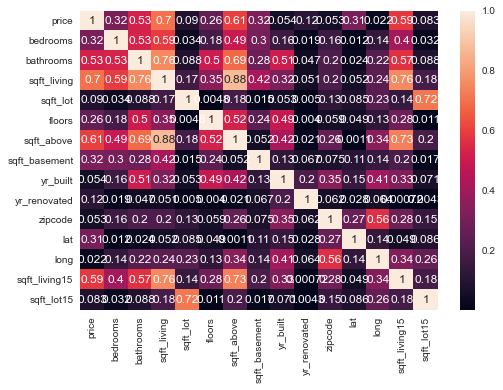

In [10]:
sns.heatmap(final.corr().abs(), annot = True)

In [15]:
final['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10])

In [13]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21588 entries, 0 to 21587
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21588 non-null  float64
 1   bedrooms       21588 non-null  int64  
 2   bathrooms      21588 non-null  float64
 3   sqft_living    21588 non-null  int64  
 4   sqft_lot       21588 non-null  int64  
 5   floors         21588 non-null  float64
 6   view           21588 non-null  object 
 7   condition      21588 non-null  object 
 8   grade          21588 non-null  object 
 9   sqft_above     21588 non-null  int64  
 10  sqft_basement  21588 non-null  float64
 11  yr_built       21588 non-null  int64  
 12  yr_renovated   21588 non-null  float64
 13  zipcode        21588 non-null  int64  
 14  lat            21588 non-null  float64
 15  long           21588 non-null  float64
 16  sqft_living15  21588 non-null  int64  
 17  sqft_lot15     21588 non-null  int64  
dtypes: flo

In [8]:
final.groupby('zipcode')['price'].count().sort_values(ascending = False)

zipcode
98103    600
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: price, Length: 70, dtype: int64

<AxesSubplot:xlabel='price', ylabel='Density'>

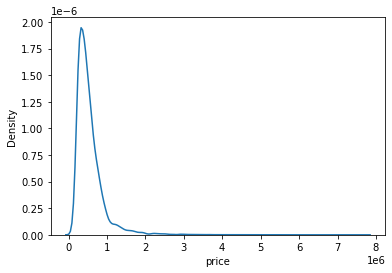

In [10]:
sns.kdeplot(df['price'])

In [11]:
len(final) * .03

647.64

In [12]:
final_nonlux = final[final.price < np.percentile(final, .97)]

TypeError: '<' not supported between instances of 'str' and 'int'

,price,bedrooms,bathrooms,sqft_living,sqft_lot
0,221900.0,3,1.00,1180,5650
1,538000.0,3,2.25,2570,7242
2,180000.0,2,1.00,770,10000
3,604000.0,4,3.00,1960,5000
4,510000.0,3,2.00,1680,8080
...,...,...,...,...,...
21583,360000.0,3,2.50,1530,1131
21584,400000.0,4,2.50,2310,5813
21585,402101.0,2,0.75,1020,1350
21586,400000.0,3,2.50,1600,2388
